In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
# pd.set_option('display.max_rows',None)
# pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('C:\\Users\\GOURAV NEGI\\Downloads\\car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Exploartory Data Analysis (EDA)

In [6]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


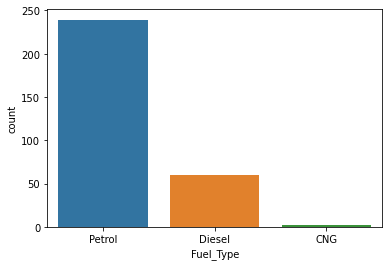

In [7]:
sns.countplot(df['Fuel_Type']);

In [8]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [9]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [10]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [11]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [12]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


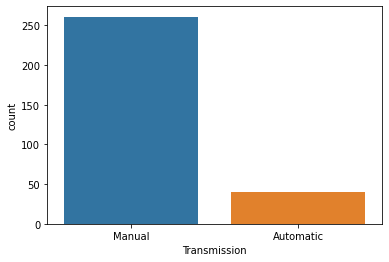

In [13]:
sns.countplot(df['Transmission']);

In [14]:
df.groupby(['Fuel_Type'])['Owner'].agg(['count'])

,count
Fuel_Type,
CNG,2
Diesel,60
Petrol,239


In [15]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [16]:
df[df['Fuel_Type']=='CNG']

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
18,wagon r,2015,3.25,5.09,35500,CNG,Dealer,Manual,0
35,sx4,2011,2.95,7.74,49998,CNG,Dealer,Manual,0


In [17]:
df[df['Owner']==3]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
85,camry,2006,2.5,23.73,142000,Petrol,Individual,Automatic,3


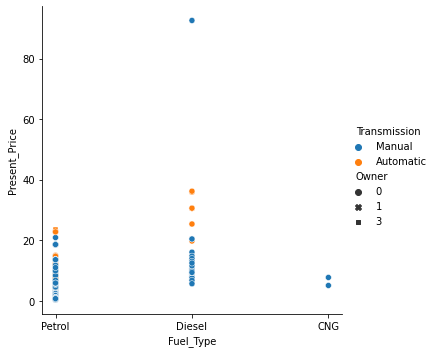

In [18]:
sns.relplot(x='Fuel_Type',y='Present_Price',hue='Transmission',style='Owner',data=df);

In [19]:
# seaborn ka bargraph avg dai ta hai 
# and 
# matplotlib ka bragraph mean dai ta hai


In [20]:
df['Age']=2022-df['Year']
df.drop(columns=['Year'],inplace=True)

In [21]:
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


In [24]:
# coorelation 
# high coorelation mean when x is increase y is too increase this 
# mean is coorelaion of  each other 

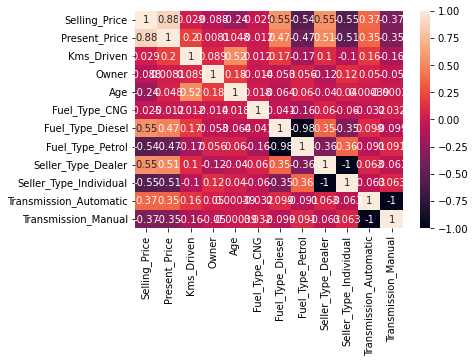

In [33]:
sns.heatmap(df.corr(),annot=True);

In [26]:
df.drop(columns=['Car_Name'],inplace=True)

# One Hot Encoding

In [27]:
df=pd.get_dummies(df,columns=['Fuel_Type','Seller_Type','Transmission'])

In [28]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,8,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,9,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,5,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,11,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,8,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6,0,1,0,1,0,0,1
297,4.00,5.90,60000,0,7,0,0,1,1,0,0,1
298,3.35,11.00,87934,0,13,0,0,1,1,0,0,1
299,11.50,12.50,9000,0,5,0,1,0,1,0,0,1


# Feature Selection

In [29]:
y = df['Selling_Price']
x = df.drop(columns=['Selling_Price'])

In [30]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [50]:
 x

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,5.59,27000,0,8,0,0,1,1,0,0,1
1,9.54,43000,0,9,0,1,0,1,0,0,1
2,9.85,6900,0,5,0,0,1,1,0,0,1
3,4.15,5200,0,11,0,0,1,1,0,0,1
4,6.87,42450,0,8,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
296,11.60,33988,0,6,0,1,0,1,0,0,1
297,5.90,60000,0,7,0,0,1,1,0,0,1
298,11.00,87934,0,13,0,0,1,1,0,0,1
299,12.50,9000,0,5,0,1,0,1,0,0,1


In [51]:
y_pred=regression.predict(x_test)
y_pred

array([ 2.95534303,  8.178939  ,  6.45427257, -1.42417501,  9.08889914,
        7.41825441,  1.33644285,  0.84027217,  1.36501949,  7.49026806,
        9.11830017,  0.58573931,  8.41612774,  3.42316502,  6.90043281,
        3.04988309,  0.48448171, 10.70970753,  1.75207005,  2.34571752,
        0.39746889,  8.11925338,  6.62469317,  2.65939066,  0.78280554,
        3.69330765,  5.24815462,  2.82676351,  2.13640446,  1.75237686,
        0.39730155,  9.11750503, -0.66188053,  2.29098014,  8.57067341,
        4.4910324 ,  7.20530369,  7.53824015,  2.89101139,  7.93588794,
        3.93585154,  4.27133211,  4.33205704,  0.6008847 ,  7.34025071,
        0.47602539,  7.29187681, 11.23125597,  3.13805132,  5.38262985,
        6.7988422 ,  2.17888955, 20.63303305, 17.0015261 ,  7.50717349,
        9.69621308,  4.47478116,  8.97377615,  1.82294639,  7.60416734,
        0.22226536])

In [ ]:
#train pai jada hogiya to overfiting ho jayega 

In [35]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [36]:
a=pd.DataFrame(x_scaled)
a.skew(axis=0)

0      4.083150
1      6.436013
2      7.616850
3      1.246189
4     12.206146
5      1.512750
6     -1.461340
7     -0.622146
8      0.622146
9      2.173776
10    -2.173776
dtype: float64

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# outler ko mean sai hata tai hain

In [38]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [39]:
regression.score(x_train,y_train)

0.8886517300804564

In [40]:
regression.score(x_test,y_test)

0.8489813024899082

In [41]:
regression.coef_

array([ 4.29152503e-01, -6.15725866e-06, -9.03759824e-01, -3.53801365e-01,
       -1.09057894e+00,  1.44269365e+00, -3.52114710e-01,  5.95296453e-01,
       -5.95296453e-01,  8.19510777e-01, -8.19510777e-01])

In [42]:
regression.intercept_

5.109208893294364

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [52]:
mean_squared_error(y_test,y_pred)

3.478803970637864

In [54]:
rmse=0.5*mean_squared_error(y_test,y_pred)
rmse

1.739401985318932

In [55]:
mean_absolute_error(y_test,y_pred)

1.2162256821296995

In [56]:
mean_absolute_percentage_error(y_test,y_pred)

0.803597340343657